In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 1000

In [4]:
data = pd.read_csv('sales-data.csv',parse_dates=['barr_date'])
data = data[(data.region_name=="North America") & (data.business_area_name=="B00 - LTC")]
data.rename(columns={"barr_date":"date","revenue": "sales"}, inplace=True)
display(data.head())

data = data[['date','sales']]
data.reset_index(drop=True, inplace=True)
data.head()

,business_area_name,region_name,date,sales
52,B00 - LTC,North America,2017-01-01,567793.73
80,B00 - LTC,North America,2017-02-01,881297.65
95,B00 - LTC,North America,2017-03-01,1059117.95
131,B00 - LTC,North America,2017-04-01,681554.66
159,B00 - LTC,North America,2017-05-01,678393.74


,date,sales
0,2017-01-01,567793.73
1,2017-02-01,881297.65
2,2017-03-01,1059117.95
3,2017-04-01,681554.66
4,2017-05-01,678393.74


In [5]:
data.shape

(60, 2)

<AxesSubplot:xlabel='Date', ylabel='Values'>

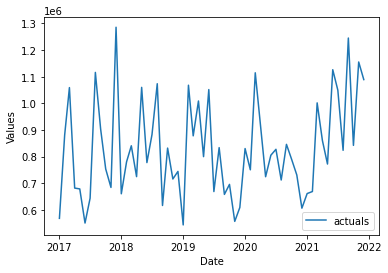

In [6]:
f = Forecaster(y=data['sales'],current_dates=data['date'])
f.plot()

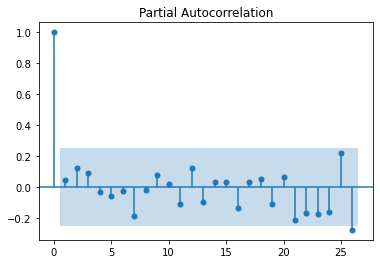

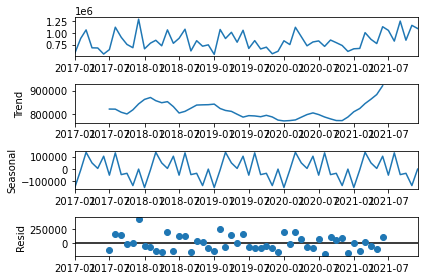

In [8]:
f.plot_pacf(lags=26)
plt.show()

f.seasonal_decompose().plot()
plt.show()

In [9]:
f.set_test_length(12)
f.generate_future_dates(12)
f.set_estimator('lstm')

Epoch 1/200
2/2 [==============================] - 43s 8s/step - loss: 0.3403 - val_loss: 0.3674
Epoch 2/200
2/2 [==============================] - 0s 163ms/step - loss: 0.3257 - val_loss: 0.3424
Epoch 3/200
2/2 [==============================] - 0s 163ms/step - loss: 0.2984 - val_loss: 0.2876
Epoch 4/200
2/2 [==============================] - 0s 165ms/step - loss: 0.2418 - val_loss: 0.1948
Epoch 5/200
2/2 [==============================] - 0s 160ms/step - loss: 0.1870 - val_loss: 0.2057
Epoch 6/200
2/2 [==============================] - 0s 158ms/step - loss: 0.2098 - val_loss: 0.1867
Epoch 7/200
2/2 [==============================] - 0s 157ms/step - loss: 0.1744 - val_loss: 0.2044
Epoch 8/200
2/2 [==============================] - 0s 155ms/step - loss: 0.1809 - val_loss: 0.2112
Epoch 9/200
2/2 [==============================] - 0s 158ms/step - loss: 0.1828 - val_loss: 0.2045
Epoch 10/200
2/2 [==============================] - 0s 154ms/step - loss: 0.1765 - val_loss: 0.1955
Epoch 11/20

2/2 [==============================] - 0s 135ms/step - loss: 0.1711 - val_loss: 0.1988
Epoch 84/200
2/2 [==============================] - 0s 138ms/step - loss: 0.1701 - val_loss: 0.1940
Epoch 85/200
2/2 [==============================] - 0s 142ms/step - loss: 0.1697 - val_loss: 0.1908
Epoch 86/200
2/2 [==============================] - 0s 142ms/step - loss: 0.1700 - val_loss: 0.1890
Epoch 87/200
2/2 [==============================] - 0s 141ms/step - loss: 0.1716 - val_loss: 0.1893
Epoch 88/200
2/2 [==============================] - 0s 156ms/step - loss: 0.1725 - val_loss: 0.1916
Epoch 89/200
2/2 [==============================] - 0s 157ms/step - loss: 0.1719 - val_loss: 0.1938
Epoch 90/200
2/2 [==============================] - 0s 161ms/step - loss: 0.1721 - val_loss: 0.1936
Epoch 91/200
2/2 [==============================] - 0s 161ms/step - loss: 0.1716 - val_loss: 0.1924
Epoch 92/200
2/2 [==============================] - 0s 155ms/step - loss: 0.1714 - val_loss: 0.1901
Epoch 93/200


2/2 [==============================] - 0s 164ms/step - loss: 0.1723 - val_loss: 0.1962
Epoch 165/200
2/2 [==============================] - 0s 163ms/step - loss: 0.1720 - val_loss: 0.1932
Epoch 166/200
2/2 [==============================] - 0s 158ms/step - loss: 0.1708 - val_loss: 0.1898
Epoch 167/200
2/2 [==============================] - 0s 156ms/step - loss: 0.1702 - val_loss: 0.1879
Epoch 168/200
2/2 [==============================] - 0s 158ms/step - loss: 0.1702 - val_loss: 0.1874
Epoch 169/200
2/2 [==============================] - 0s 156ms/step - loss: 0.1703 - val_loss: 0.1869
Epoch 170/200
2/2 [==============================] - 0s 179ms/step - loss: 0.1703 - val_loss: 0.1863
Epoch 171/200
2/2 [==============================] - 0s 159ms/step - loss: 0.1701 - val_loss: 0.1859
Epoch 172/200
2/2 [==============================] - 0s 164ms/step - loss: 0.1706 - val_loss: 0.1852
Epoch 173/200
2/2 [==============================] - 0s 160ms/step - loss: 0.1707 - val_loss: 0.1842
Epoc

Epoch 46/200
2/2 [==============================] - 0s 173ms/step - loss: 0.1671 - val_loss: 0.1899
Epoch 47/200
2/2 [==============================] - 0s 181ms/step - loss: 0.1671 - val_loss: 0.1897
Epoch 48/200
2/2 [==============================] - 0s 169ms/step - loss: 0.1671 - val_loss: 0.1894
Epoch 49/200
2/2 [==============================] - 0s 170ms/step - loss: 0.1672 - val_loss: 0.1888
Epoch 50/200
2/2 [==============================] - 0s 171ms/step - loss: 0.1672 - val_loss: 0.1886
Epoch 51/200
2/2 [==============================] - 0s 171ms/step - loss: 0.1671 - val_loss: 0.1890
Epoch 52/200
2/2 [==============================] - 0s 171ms/step - loss: 0.1670 - val_loss: 0.1888
Epoch 53/200
2/2 [==============================] - 0s 170ms/step - loss: 0.1672 - val_loss: 0.1877
Epoch 54/200
2/2 [==============================] - 0s 168ms/step - loss: 0.1672 - val_loss: 0.1875
Epoch 55/200
2/2 [==============================] - 0s 175ms/step - loss: 0.1674 - val_loss: 0.1874


2/2 [==============================] - 0s 175ms/step - loss: 0.1672 - val_loss: 0.1902
Epoch 128/200
2/2 [==============================] - 0s 155ms/step - loss: 0.1670 - val_loss: 0.1899
Epoch 129/200
2/2 [==============================] - 0s 152ms/step - loss: 0.1671 - val_loss: 0.1890
Epoch 130/200
2/2 [==============================] - 0s 154ms/step - loss: 0.1672 - val_loss: 0.1890
Epoch 131/200
2/2 [==============================] - 0s 175ms/step - loss: 0.1673 - val_loss: 0.1902
Epoch 132/200
2/2 [==============================] - 0s 179ms/step - loss: 0.1677 - val_loss: 0.1894
Epoch 133/200
2/2 [==============================] - 0s 171ms/step - loss: 0.1674 - val_loss: 0.1882
Epoch 134/200
2/2 [==============================] - 0s 152ms/step - loss: 0.1670 - val_loss: 0.1879
Epoch 135/200
2/2 [==============================] - 0s 153ms/step - loss: 0.1677 - val_loss: 0.1882
Epoch 136/200
2/2 [==============================] - 0s 153ms/step - loss: 0.1677 - val_loss: 0.1898
Epoc

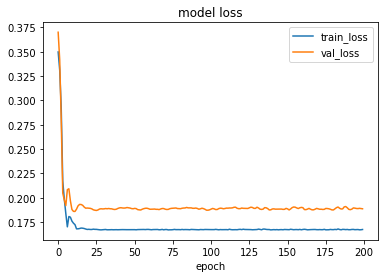

In [15]:
f.manual_forecast(call_me='lstm',
                  lags=12,
                  batch_size=16,
                  epochs=200,
                  validation_split=.20,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(100,)*15,
                  dropout=(0,)*15,
                  plot_loss=True)

<AxesSubplot:xlabel='Date', ylabel='Values'>

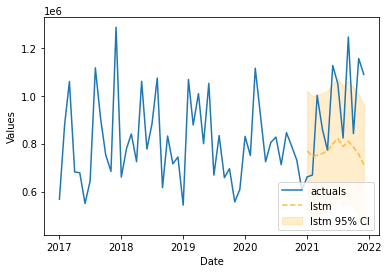

In [17]:
f.plot_test_set(ci=True)

<AxesSubplot:xlabel='Date', ylabel='Values'>

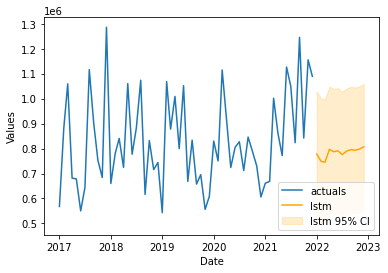

In [18]:
f.generate_future_dates(12)
f.add_time_trend()
f.export(to_excel=True,excel_name='results.xlsx')
f.plot(ci=True)

In [19]:
f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname',
     'LevelTestSetMAPE',
     'LevelTestSetRMSE',
     'LevelTestSetR2',
     'best_model']
]

,ModelNickname,LevelTestSetMAPE,LevelTestSetRMSE,LevelTestSetR2,best_model
0,lstm,0.19,249467.53,-0.77,True


In [20]:
test_2021 = f.export_test_set_preds_with_cis('lstm')
display(test_2021.head(12))

predicted_2022 = f.export_forecasts_with_cis('lstm')
display(predicted_2022.head(12))

,DATE,UpperPreds,Preds,Actuals,LowerPreds,ModelNickname,CILevel
0,2021-01-01,1020996.58,769520.69,660958.61,518044.81,lstm,0.95
1,2021-02-01,998358.02,746882.13,668588.28,495406.25,lstm,0.95
2,2021-03-01,1002939.51,751463.63,1001685.19,499987.75,lstm,0.95
3,2021-04-01,1010372.98,758897.10,860247.82,507421.22,lstm,0.95
4,2021-05-01,1020653.86,769177.98,771891.20,517702.10,lstm,0.95
5,2021-06-01,1050455.78,798979.90,1126363.91,547504.02,lstm,0.95
6,2021-07-01,1072555.41,821079.53,1049296.31,569603.65,lstm,0.95
7,2021-08-01,1039478.92,788003.04,823429.19,536527.15,lstm,0.95
8,2021-09-01,1061144.44,809668.55,1245351.65,558192.67,lstm,0.95
9,2021-10-01,1036680.01,785204.13,842032.79,533728.24,lstm,0.95


,DATE,UpperForecast,Forecast,LowerForecast,ModelNickname,CILevel
0,2022-01-01,1029322.53,777846.65,526370.77,lstm,0.95
1,2022-02-01,1000136.29,748660.41,497184.52,lstm,0.95
2,2022-03-01,997015.23,745539.35,494063.46,lstm,0.95
3,2022-04-01,1048089.11,796613.22,545137.34,lstm,0.95
4,2022-05-01,1038790.04,787314.15,535838.27,lstm,0.95
5,2022-06-01,1042243.56,790767.68,539291.79,lstm,0.95
6,2022-07-01,1027056.20,775580.32,524104.43,lstm,0.95
7,2022-08-01,1041230.83,789754.94,538279.06,lstm,0.95
8,2022-09-01,1047073.74,795597.86,544121.97,lstm,0.95
9,2022-10-01,1044710.98,793235.10,541759.21,lstm,0.95


In [21]:
Total_2021 = test_2021['Actuals'].sum()
Total_2022 = predicted_2022['Forecast'].sum()

Yoy_growth = (Total_2022 - Total_2021)/ Total_2021 * 100

print(f'Total_2021:{Total_2021}')
print(f'Total_2022:{Total_2022}')
print(f'YOY (growth):{Yoy_growth}')

Total_2021:11294363.570461998
Total_2022:9405836.821259895
YOY (growth):-16.720966501743774
